# Quantum Machine Learning
Jin Yeom (jin.yeom@hudl.com)

## Contents
- [Introduction to Quantum Computing](#Introduction-to-Quantum-Computing)

## Introduction to Quantum Computing

Let us consider coin flipping. With two possible outcomes, the probability of heads $p_0$ and that of tails $p_1$ sum up to $1$. This probability distribution can also be represented as a column stochastic vector $\vec{p} = \begin{bmatrix} p_0 \\ p_1 \end{bmatrix}$, where $\left\lVert\vec{p}\right\rVert_1 = 1$. In this case of classical probability theory, both $p_0$ and $p_1$ are constrained to be non-negative real number. Additionally, the **entropy** of a probability distribution measures its unpredictability; it is defined as $H = -\sum_i{P_i \log{P_i}}$.

### Qubit (Quantum bit)

A **quantum state**, on the other hand, is represented as $|\psi\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$ (read *psi ket*), where $a_0$ and $a_1$ are complex numbers, and $\left\lVert|\psi\rangle\right\rVert_2 = 1$. This simplest possible quantum state with two possible outcomes is often refered to as a **qubit**.

Quantum **superposition** states that any two (or more) quantum states can be added together ("superposed") and the result will be another valid quantum state. Note that this is not the same as simply not knowing in which state a qubit is in; rather, superposition states that its state is a linear combination of the two possible states, and once its state is observed is when its state **collapses (wave function collapse)** to a single deterministic state. More formally, superposition is an expansion of a quantum state in a basis as following,

$$
|\psi\rangle = a_0\begin{bmatrix} 1 \\ 0 \end{bmatrix} + a_1\begin{bmatrix} 0 \\ 1 \end{bmatrix} 
             = a_0|0\rangle + a_1|1\rangle
$$

where $a_0$ and $a_1$ are coefficients of $|0\rangle$ and $|1\rangle$, or **probability amplitudes** (sometimes called *Born probability*). In comparison to coin flipping as mentioned earlier, where $p_0$ and $p_1$ directly represent the probabilities of heads or tails, the probability of either $0$ or $1$ is represented by $|a_0|^2$ or $|a_1|^2$. Accordingly, $|a_0|^2 + |a_1|^2 = 1$.

In [11]:
# TODO: talk about interference and entanglement

### Multiple Qubits

### Qiskit (Quantum Information Science Kit)

Now, we're going to try simulating coin tossing on a quantum computer, using an open source framework for quantum computing called **Qiskit**. We'll build a `QuantumCircuit` with a single `QuantumRegister` (qubit) for computation and a `ClassicalRegister`, where the measurement results are stored.

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

In [2]:
backend = BasicAer.get_backend("qasm_simulator")

In [3]:
q = QuantumRegister(1, "q")  # single qubit for computation
c = ClassicalRegister(1)  # for storing results
circuit = QuantumCircuit(q, c)

In [4]:
# map the measurement of `q` to `c`
circuit.measure(q, c)

Qubits in `QuantumRegister` are initialized with $|0\rangle$, so we should get $0$ from every measurement (which means the probability of heads is $1$).

In [5]:
job = qiskit.execute(circuit, backend, shots=100)
result = job.result()
result.get_counts(circuit)

{'0': 100}

In [6]:
circuit.draw()

This time, we're going to visualize the qubit on a **Bloch sphere**. North and south poles of a Bloch sphere represent $|0\rangle$ and $|1\rangle$, and every possible quantum state is represented as a point on its surface.

In [7]:
backend_statevector = BasicAer.get_backend("statevector_simulator")

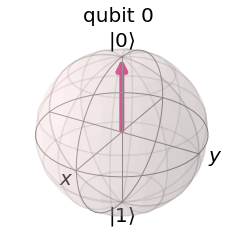

In [10]:
circuit.iden(q[0])  # Apply Identity to q.
job = qiskit.execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

Let's make the coin unbiased now. This can be done with an operator called **interference**.